In [4]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/*'.format(shared_drive_foldername)
  print('Running Code in Colab')
except:
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import sys
sys.path.append(root + '1. Acquisition/notebooks')

from nutrecon import *

import numpy as np
from glob import glob
from datetime import datetime
import json

from random import shuffle, sample
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns

subject_nr = 1

_v_ = Vars()

experiment_code = _v_.experiment_code
dataPath = _v_.dataPath

neuroEcon_id = _v_.neuroEcon_id
responses_dataPath = _v_.responses_dataPath


Running Code locally


In [5]:
neuroEcon_paths = glob('{}*{}*'.format(responses_dataPath,neuroEcon_id))


def load_all_responses(paths):

    for fpath in paths:
        file_df = pd.read_json(fpath)
        if fpath == paths[0]:
            df = file_df
        else:
            df = pd.concat([df, file_df], ignore_index=True)
    
    return df

neurEcon_df = load_all_responses(neuroEcon_paths)

neurEcon_df.head()

,Day,Trial,Trial ID,Trial Type,User,block,choice,choiceStart_ms,choiceTime,choiceTime_ms,...,lottery shape,lottery type,optionTime,reference flavor,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms
0,day2,1,21,same,nutre001,0,2,49313,2250,50147,...,,money,2000,,1.0,1.0,,money,1669375559,47371
1,day2,2,50,same,nutre001,0,2,52917,2250,54018,...,hexagon,C-,2000,cashew,1.0,20.0,hexagon,C-,1669375563,51034
2,day2,3,18,same,nutre001,0,2,56771,2250,57055,...,,money,2000,,1.0,1.0,,money,1669375567,54891
3,day2,4,71,same,nutre001,0,1,59808,2250,60876,...,hexagon,C-,2000,cashew,1.0,20.0,hexagon,C-,1669375570,57937
4,day2,5,36,same,nutre001,0,1,63662,2250,64280,...,square,C+,2000,pomegranate,1.0,20.0,square,C+,1669375574,61796


<AxesSubplot: xlabel='deltaOptionTime', ylabel='Count'>

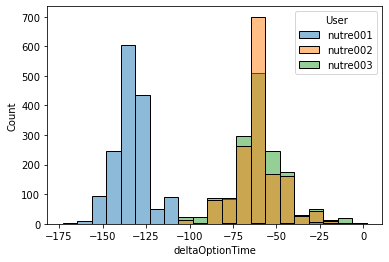

In [7]:
neurEcon_df['deltaOptionTime'] = neurEcon_df['choiceStart_ms'] - neurEcon_df['trialStart_ms'] - neurEcon_df['optionTime']

sns.histplot(data = neurEcon_df, x = 'deltaOptionTime', hue = 'User')



<AxesSubplot: xlabel='Trial', ylabel='deltaOptionTime'>

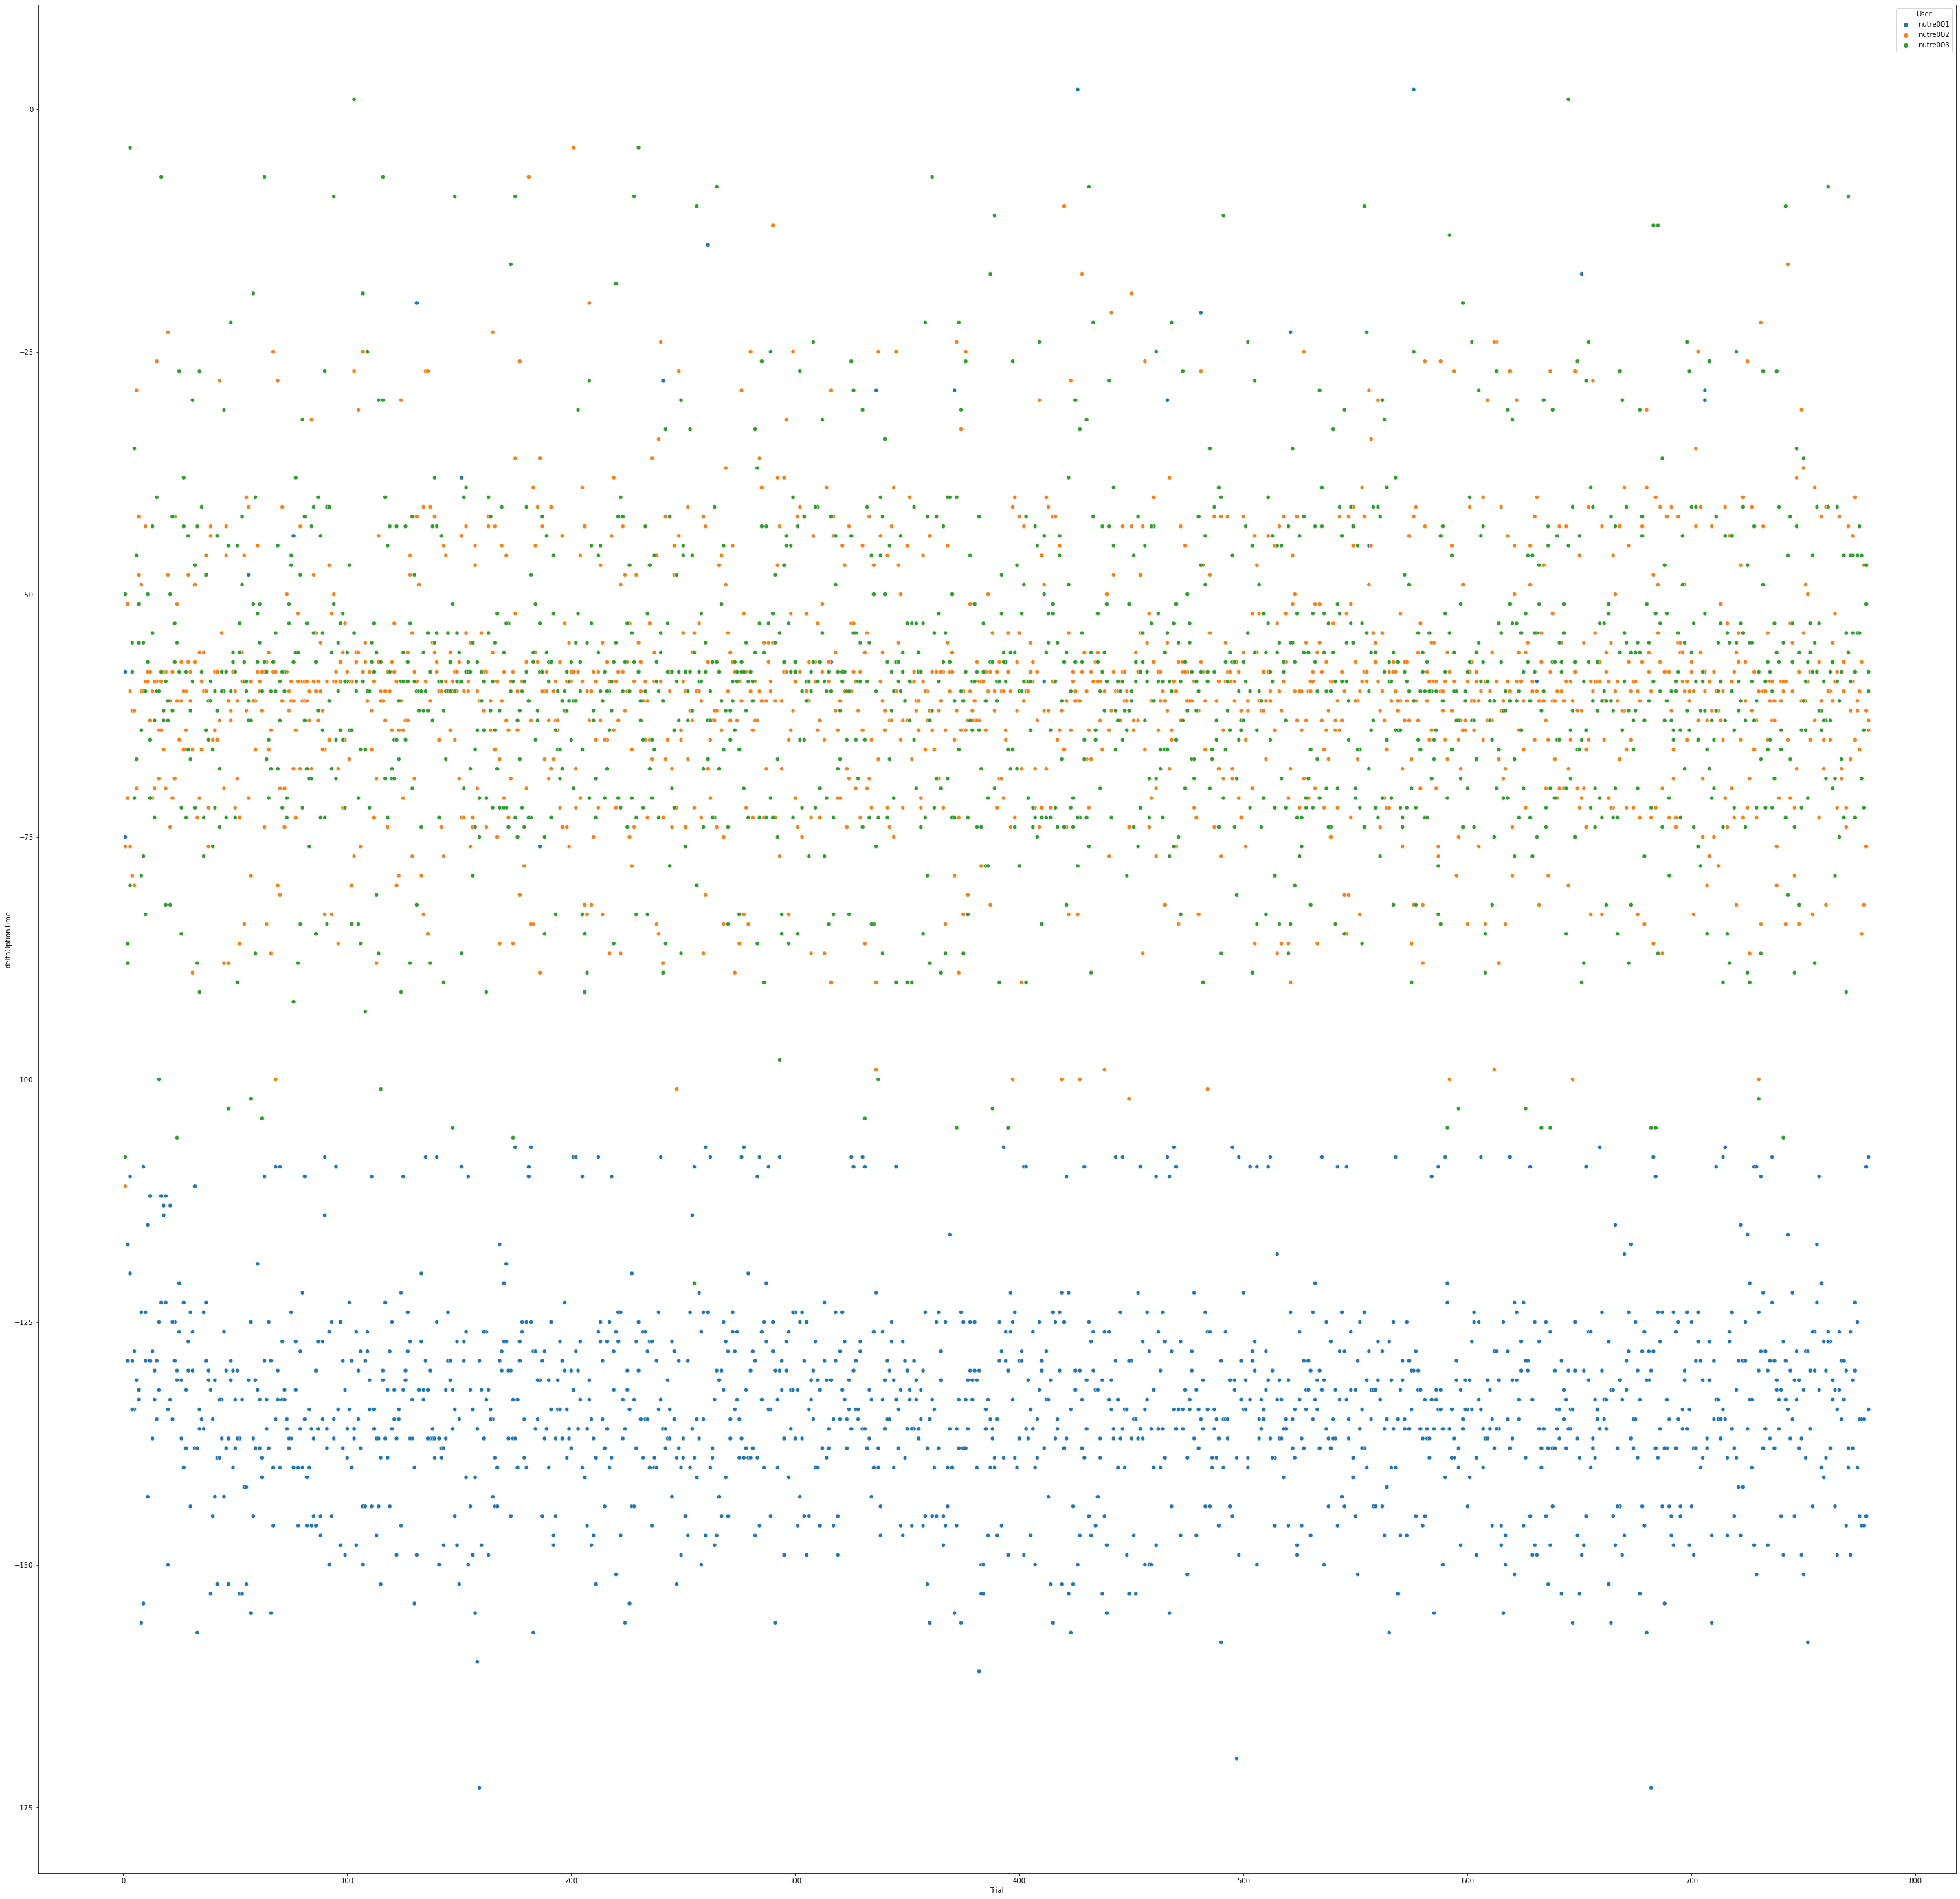

In [8]:
fig, ax = plt.subplots(figsize = (50,50))

sns.scatterplot(data = neurEcon_df, x = 'Trial', y = 'deltaOptionTime', hue = 'User', ax = ax)